# Команда «МиниМакс»  
Авилов Максим  
Денисов Денис  
Козулин Илья  
Сенников Андрей  

Графическая интерпретация модели выглядит следующим образом: 

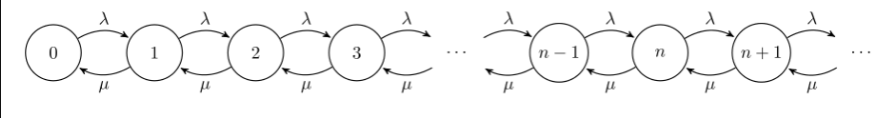

В рамках рассматриваемой задачи смоделируем простейшую модель массового обслуживания M/M/1/∞.

М/M показывают, что система имеет входной пуассоновский поток заявок (момент появления нового клиента в очереди распределен с параметром λ), и время обслуживания экспоненциально распределено с коэффициентом μ ссответственно.

Третье значение "1" показывает, что наша модель имеет ровно один обработчик требований.

Последнее значение "∞"  означает, что на вход подается бесконечный поток.

Эти показатели в модели фиксированы и в течение лабораторной работы изменяться не будут. В качестве экспериментов будем изменять λ и µ соответсвенно.

Каждое следующее состояние будет означать изменение количество запросов в очереди, т.е. приход нового запроса или окончание обслживание одного из старых.

$$\Omega = \left\{ \omega = (\omega_1, \omega_2, ..., \omega_n, ...): \omega_i \in \left\{ 0, 1, 2, ...\right\} \right\}$$
$$\mathcal{F}=2^\Omega$$
$$P(\omega_{i+1}=k+1 \;|\; \omega_i=k)=\frac{\lambda}{\mu + \lambda}$$
$$P(\omega_{i+1}=k-1 \;|\; \omega_i=k)=\frac{\mu}{\mu + \lambda}$$
$$P(\omega_{i+1}=1 \;|\; \omega_i=0)=1$$
$$$$

In [1]:
from queue_simulation.markovian import Markovian

import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio

from plotly.subplots import make_subplots

Average Queue Size = 0.16511558090663464
Average System Time = 0.4986261755459831


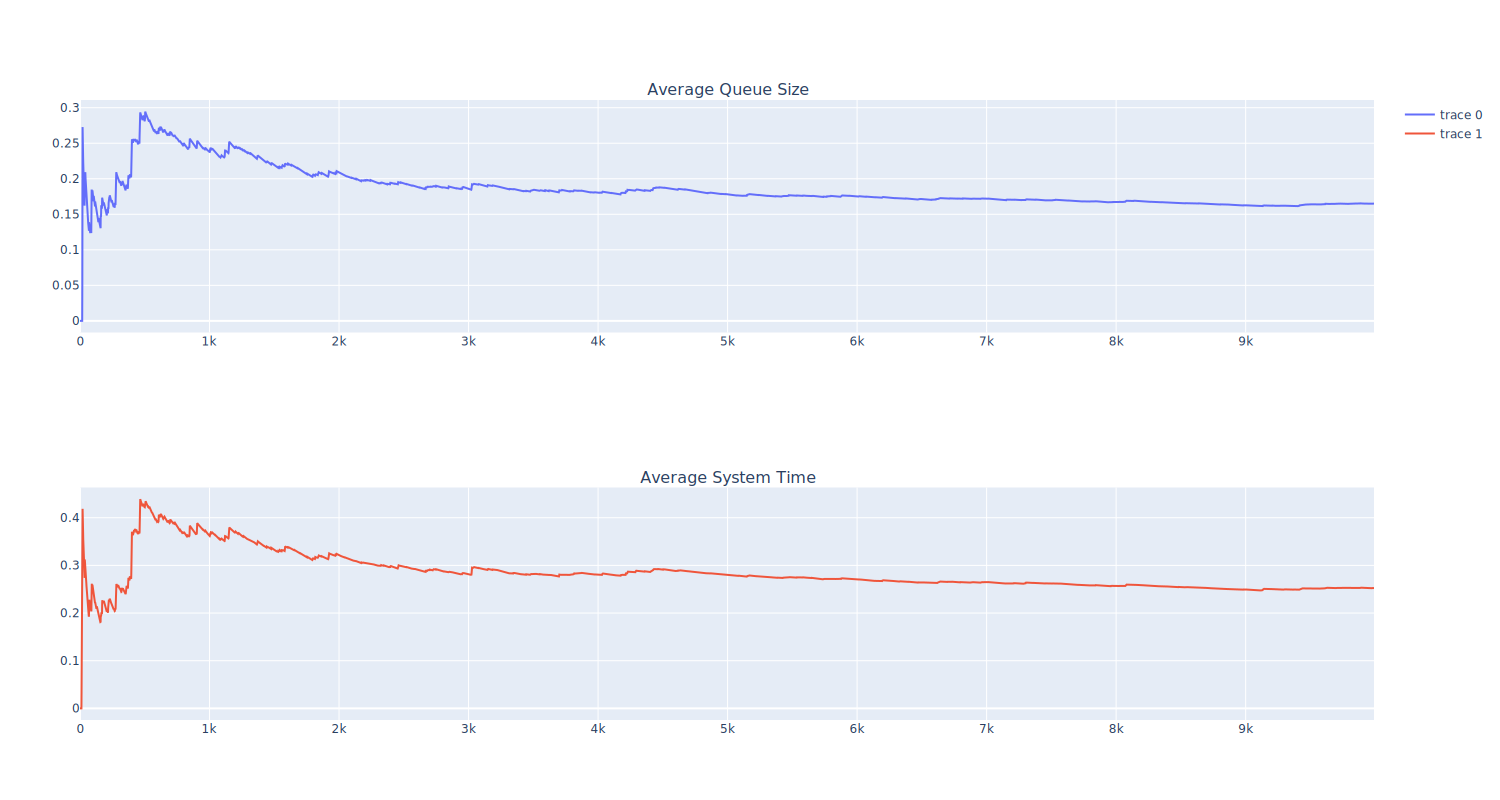

In [6]:
queue = Markovian(1, 3)
metrics = queue.run(10000)
print(f"Average Queue Size = {metrics['Average Queue Size']}")
print(f"Average System Time = {metrics['Average System Time']}")

fig = make_subplots(rows=2, cols=1, subplot_titles=("Average Queue Size", "Average System Time"))

fig.add_trace(
    go.Scatter(x=list(range(len(metrics["Average Queue Size Per Moment"]))), y=metrics["Average Queue Size Per Moment"]), 
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=list(range(len(metrics["Average System Time Per Moment"]))), y=metrics["Average System Time Per Moment"]), 
    row=2, col=1
)

fig.update_layout(
    height=800, width=1500
)

fig.show("svg")

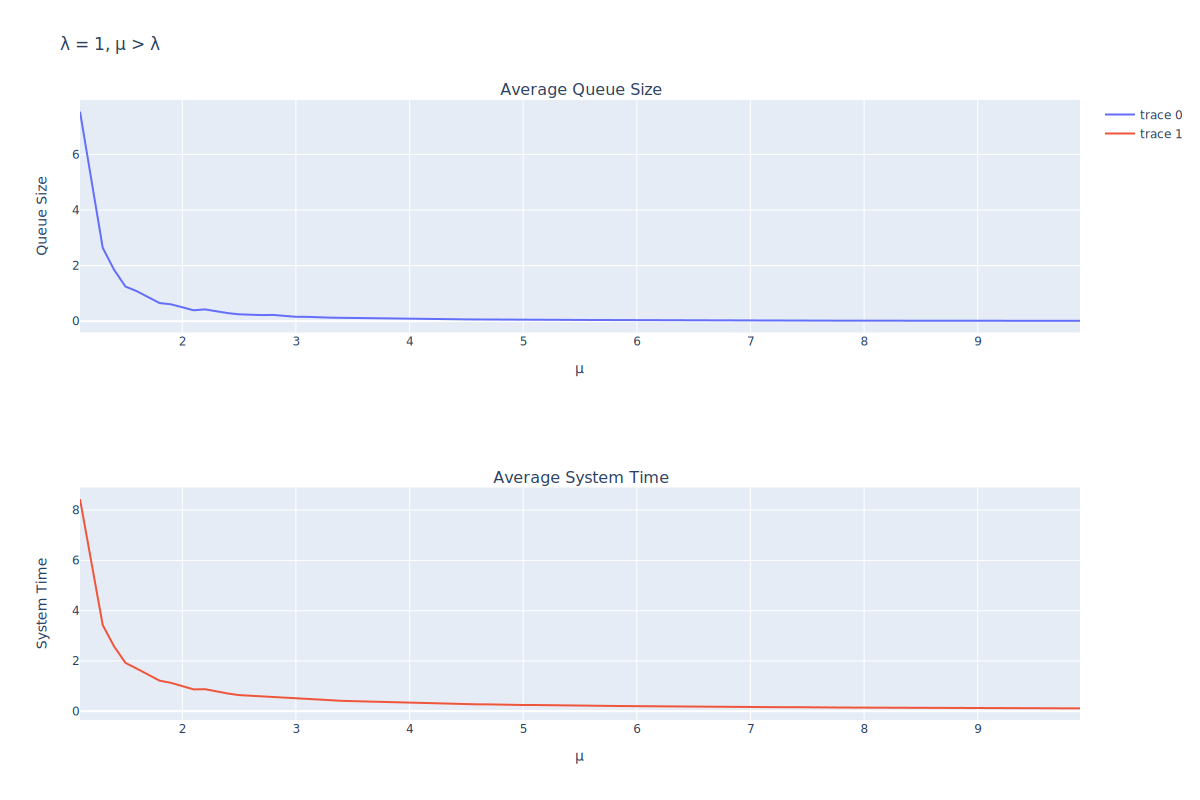

In [7]:
lmda = 1
avg_queue_size = []
avg_system_time = []
mus = []
fig = make_subplots(rows=2, cols=1, subplot_titles=("Average Queue Size", "Average System Time"))
for mu in np.arange(1.1, 10, 0.1):
    queue = Markovian(lmda, mu)
    metrics = queue.run(10000)
    avg_queue_size.append(metrics["Average Queue Size"])
    avg_system_time.append(metrics["Average System Time"])
    mus.append(mu)

fig.add_trace(
    go.Scatter(x=mus, y=avg_queue_size), 
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=mus, y=avg_system_time), 
    row=2, col=1
)

fig.update_xaxes(
    title_text="µ", 
    row=1, col=1
)

fig.update_xaxes(
    title_text="µ", 
    row=2, col=1
)

fig.update_yaxes(
    title_text="Queue Size", 
    row=1, col=1
)

fig.update_yaxes(
    title_text="System Time", 
    row=2, col=1
)

fig.update_layout(
    height=800, width=1200, 
    title_text="λ = 1, µ > λ"
)

fig.show("svg")

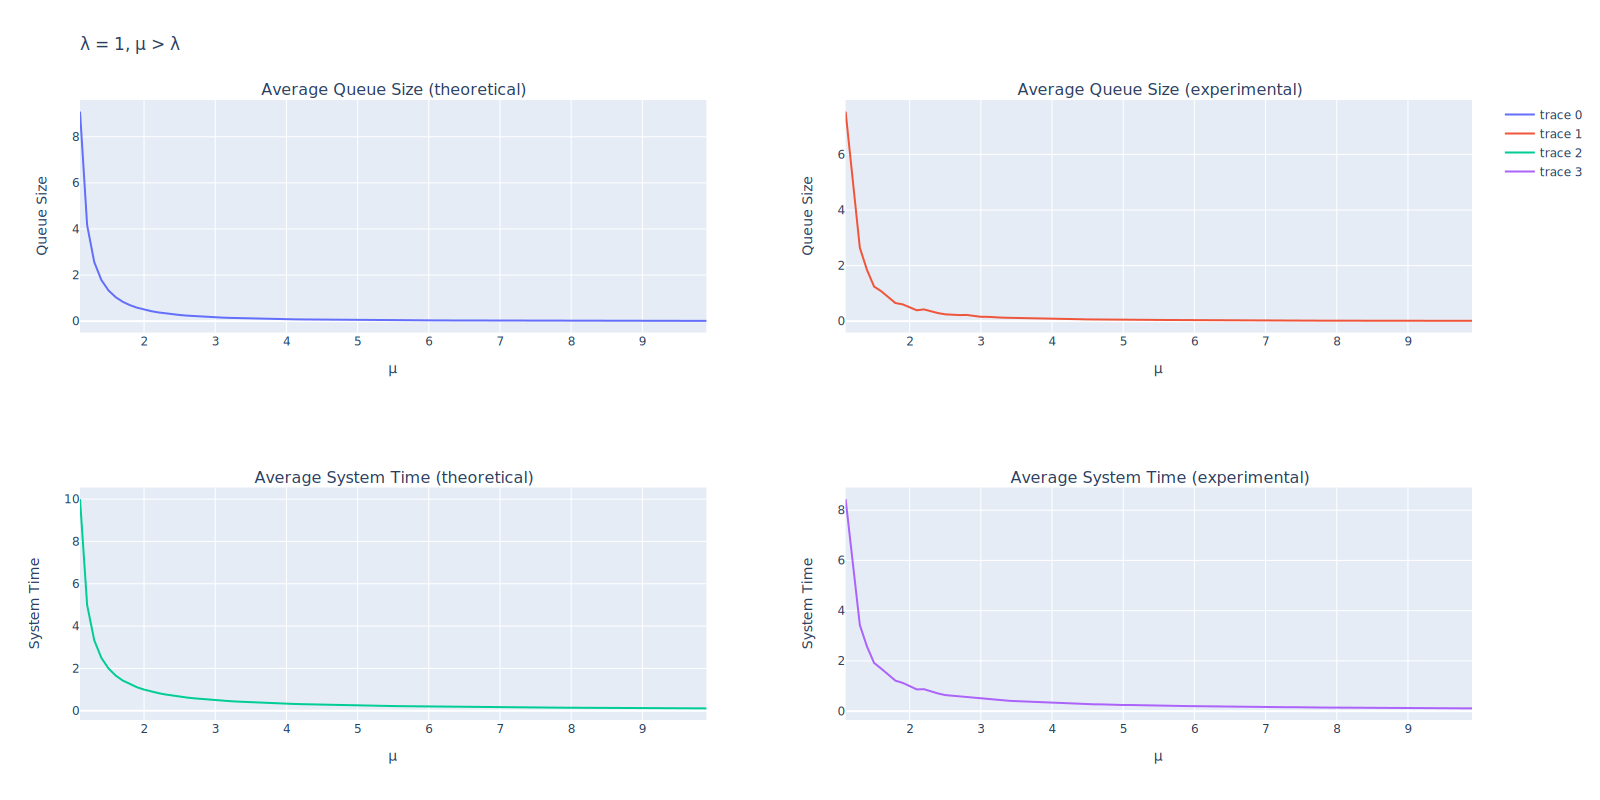

In [10]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Average Queue Size (theoretical)", "Average Queue Size (experimental)", 
                                                    "Average System Time (theoretical)", "Average System Time (experimental)"))

queue_size_estimates = [(lmda*lmda) / (mu * (mu - lmda)) for mu in mus]
system_time_estimates = [1 / (mu - lmda) for mu in mus]

fig.add_trace(
    go.Scatter(x=mus, y=queue_size_estimates), 
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=mus, y=avg_queue_size), 
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=mus, y=system_time_estimates), 
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=mus, y=avg_system_time), 
    row=2, col=2
)

fig.update_xaxes(
    title_text="µ", 
    row=1, col=1
)

fig.update_xaxes(
    title_text="µ", 
    row=1, col=2
)

fig.update_xaxes(
    title_text="µ", 
    row=2, col=1
)

fig.update_xaxes(
    title_text="µ", 
    row=2, col=2
)

fig.update_yaxes(
    title_text="Queue Size", 
    row=1, col=1
)

fig.update_yaxes(
    title_text="Queue Size", 
    row=1, col=2
)

fig.update_yaxes(
    title_text="System Time", 
    row=2, col=1
)

fig.update_yaxes(
    title_text="System Time", 
    row=2, col=2
)

fig.update_layout(
    height=800, width=1600, 
    title_text="λ = 1, µ > λ"
)

fig.show("svg")